우선, SBCE비디오의 프레임을 추출해서 저장해야함 

fps가 25로 보이지만, RAPID를 통해 추출된 mpg비디오는 똑같은 프레임이 5장씩 나오게 되어 실질적인 fps는 5임

In [2]:
import os
import cv2 
import time

In [3]:
video_dir = './video_sample'


video_list = [i for i in sorted(os.listdir(video_dir)) if 'mpg' in i]
folder_name = range(1, len(video_list)+1)

for index, video in zip(folder_name, video_list):
    print('{:02d} : {}'.format(index, video))

01 : 김 민경 (19998616) 31 Aug 18_1.mpg
02 : 박 명자 (28372171) 10 Dec 18_1.mpg


In [4]:
print('number of videos:', int(len(video_list)))

number of videos: 2


비디오 index, 비디오 마다 프레임 추출하는 데 걸린 시간, 프레임 수를 readme로 저장 

이는 다시 그 프레임들을 불러와 AI model로 양성예측하면서 Grad-CAM 씌운 이미지 결합해서 만들때, 필요한 정보 

In [5]:
save_dir = video_dir

file = open(save_dir + '/' + 'readme.txt', 'w')
file.write('index|video|elapsed time|number of frames\n')

42

frame을 추출해서 video 이름순으로 폴더명을 숫자로 만들어 그 안에 저장하는 함수

In [6]:
def saveframe(video_path, save_dir, sub_folder):
#     video_path = os.path.join(video_dir, video)
#     index = '{:02d}'.format(index)
    save_path = os.path.join(save_dir, sub_folder)
    if not(os.path.isdir(save_path)):
        os.makedirs(save_path)  
    
    video_name = os.path.basename(video_path)
    prefix = video_name.split('.')[0]
    print(video_name, ' | ', save_path, ' | saving .... ')
                        
    cap = cv2.VideoCapture(video_path)   # capturing the video from the given path
    n_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT) # cap.get(7), total # of frame
    frameRate =  cap.get(cv2.CAP_PROP_FPS) # cap.get(5), frame rate
    
    count = 0
    start_time = time.time()
    while(cap.isOpened()):
        frameId =  cap.get(cv2.CAP_PROP_POS_FRAMES)  # cap.get(1), current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if frameId % 5 == 0: #if (frameId % math.floor(frameRate) == 0):
            count += 1
#             filename = save_dir + '/frame_{0:05d}.jpg'.format(count)
            filename = save_path + '/{0}_frame_{1:05d}.jpg'.format(prefix, count)
            cv2.imwrite(filename, frame) # 폴더명 한글 x
    time_taken = time.time() - start_time
    min_sec = time.strftime("%M:%S", time.gmtime(time_taken))
    ms = '{:03d}'.format(int((time_taken - int(time_taken))*1000))
    time_taken = '.'.join([min_sec, ms])
    print('elapsed time: {}, number of frames: {}'.format(time_taken, count))
    return time_taken, count

In [7]:
for index, video in zip(folder_name, video_list):
    video_path = os.path.join(video_dir, video)
    time_taken, count = saveframe(video_path, save_dir, sub_folder = '{:02d}'.format(index))
#         file.write('{:02d} | {} | {}\n'.format(index, video, time_taken))
    file.write('{:02d}|{}|{}|{}\n'.format(index, video, time_taken, count))
file.close()

김 민경 (19998616) 31 Aug 18_1.mpg  |  ./video/01  | saving .... 
elapsed time: 01:16.963, number of frames: 7991
박 명자 (28372171) 10 Dec 18_1.mpg  |  ./video/02  | saving .... 
elapsed time: 02:28.793, number of frames: 15355


In [8]:
file = open(save_dir + '/' + 'readme.txt', 'r')

file.readlines()

['index|video|elapsed time|number of frames\n',
 '01|김 민경 (19998616) 31 Aug 18_1.mpg|01:16.963|7991\n',
 '02|박 명자 (28372171) 10 Dec 18_1.mpg|02:28.793|15355\n']

In [9]:
os.listdir(save_dir + '/' + '01')

['김 민경 (19998616) 31 Aug 18_1_frame_00001.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00002.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00003.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00004.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00005.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00006.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00007.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00008.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00009.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00010.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00011.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00012.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00013.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00014.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00015.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00016.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00017.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00018.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00019.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_00020.jpg',
 '김 민경 (19998616) 31 Aug 18_1_frame_0002

In [16]:
sample = save_dir+ '/' + '01' + '/' + os.listdir(save_dir + '/' + '01')[0]

sample = cv2.imread(sample)

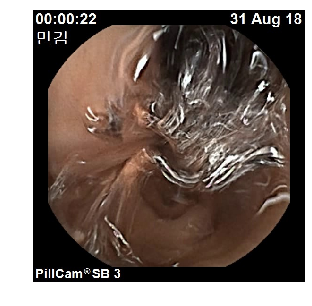

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()